# Downloading Google Trends Data (Python version)
Google trends data can be quite usefull to understand behavioral differences in response to a public health risk, particulary when it comes to gauging the perception of such risk.

The ggtrends module from Epigraphhub returns the results as convenient pandas dataframes.

In [25]:
from epigraphhub.data.ggtrends import (
    historical_interest,
    interest_by_region,
    interest_over_time,
)
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

Let's try a first search by region.

In [2]:
keywords = ["covid", "vaccine"]
interest_by_region(keywords)

,geoCode,covid,vaccine
geoName,,,
Afghanistan,AF,64,36
Albania,AL,85,15
Algeria,DZ,98,2
American Samoa,AS,76,24
Andorra,AD,98,2
...,...,...,...
Western Sahara,EH,94,6
Yemen,YE,62,38
Zambia,ZM,74,26


## Fetching time-series 
We can get the interest overtime for a specific geographic location, using the country 2-letter ISO code. In example for Brasil, we also remind you that you have to translate the keywords to the local language.

The `interest_over_time` function will get you by default one year long series.

In [16]:
iot_BR = interest_over_time(["covid", "vaccine", "vacina"], geo='BR')
iot_BR

,covid,vaccine,vacina,isPartial
date,,,,
2021-04-04,57,0,27,False
2021-04-11,50,0,28,False
2021-04-18,45,0,28,False
2021-04-25,40,0,26,False
2021-05-02,48,0,33,False
2021-05-09,50,0,40,False
2021-05-16,52,0,37,False
2021-05-23,55,0,38,False
2021-05-30,56,0,41,False


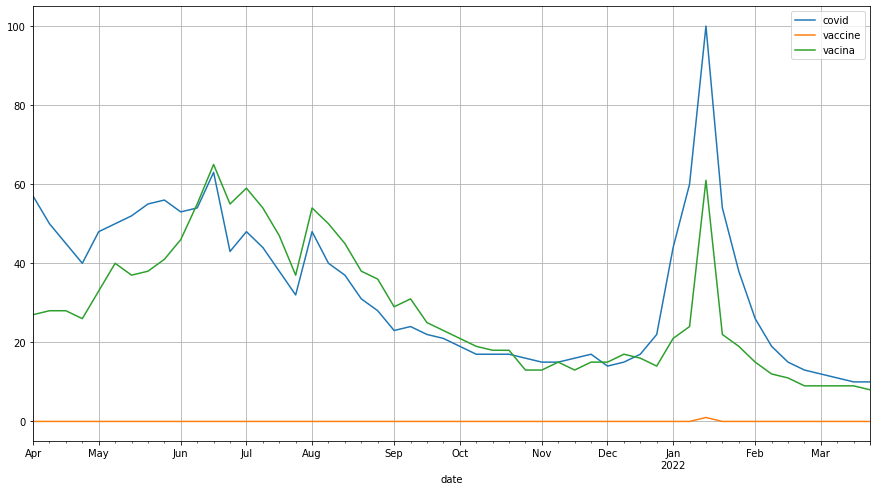

In [17]:
iot_BR.plot(figsize=(15,8), grid=True);

You can also drill down to subregions, and different timeframes. Below we show the same search for the state of Ceará in Brazil, from March 2020 to April 2022.

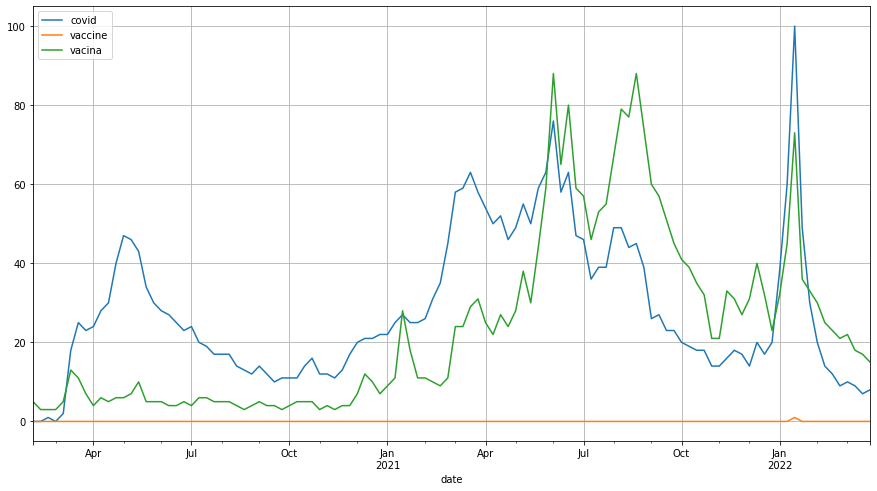

In [21]:
iot_BR_CE = interest_over_time(["covid", "vaccine", "vacina"], geo='BR-CE', timeframe='2020-02-03 2022-04-01')
iot_BR_CE.plot(figsize=(15,8), grid=True);

With the `historical_interest` function we can get hourly results on a time window of a maximum of one week

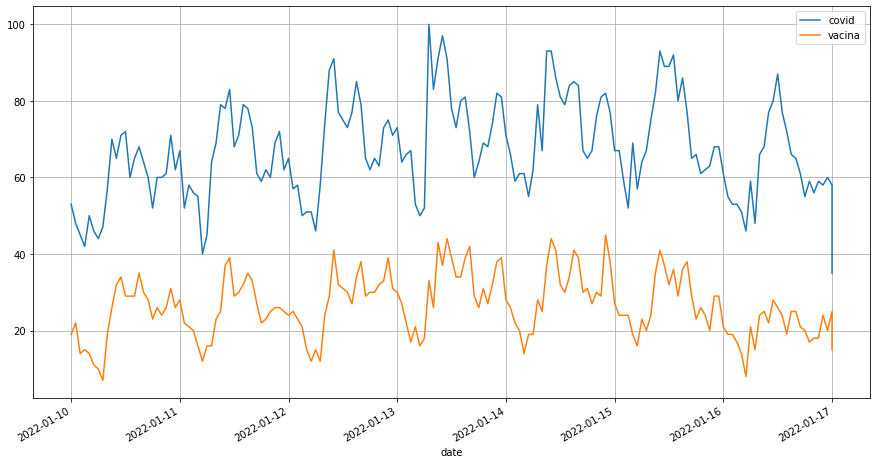

In [27]:
hi = historical_interest(["covid", "vacina"], geo='BR',year_start=2022, month_start=1,
                                day_start=10, hour_start=0, year_end=2022,
                                month_end=1, day_end=17, hour_end=0)#,frequency='hourly')
hi.plot(figsize=(15,8), grid=True);